# ARM

## Introduction
Association rule mining (ARM) can be used in market analysis to determine what products, given their previous purchases, consumers will also buy. In order to examine consumer purchasing patterns For example, the ARM test can be run on an e-commerce dataset containing electronic transactions of various products by customers. i.e., people are more likely to buy a particular product later on if they purchase it first.

The antecedents are the feature data X. X is the description of the product that the customer purchased in this collection. Finding consequents (Y) is the first step in determining how likely it is that a consumer will buy product X and then purchase product Y based on their confidence and lift. 

## Theory[^1]
An unsupervised rule-based machine learning technique called association rule mining (ARM) is used to find relationships between variables in big databases. The aim of ARM is to identify rules that will forecast the occurrence of an item based on the occurrences of other items in the training data, given a collection of transactions (training data).

[^1]: Wikimedia Foundation. (2023, October 10). Association rule learning. Wikipedia. https://en.wikipedia.org/wiki/Association_rule_learning 

An antecedent (if) and a consequent (then) comprise an association rule. Something that can be found in data is called an antecedent, and something that can be found in connection with the antecedent is called a consequent. Take A and B as itemsets, for instance. An association rule would be A => B.

3 important metrics in ARM:

1. Support : (supp(X,Y))
As an indicator of how frequently the itemsets X and Y occur together in relation to all other transactions. For example, P(X∩Y)=(total number of transactions) / (number of transactions including X and Y).The minimum (support) criterion is used to eliminate samples that do not have sufficient support to be considered significant.

1. Confidence : (Conf(X , Y))
Confidence measures the frequency with which items in X and Y occur together in relation to X-containing transactions. conf(X => Y) = P(Y|X) = supp(X ∩ Y) / supp(X) = (number of transactions containing X and Y) / (number of transactions contain X), for example. X is the antecedent and Y is the consequent in this scenario. One of the best ways to highlight the relationship between specific elements in the dataset is to use confidence in association rule mining.

1. Lift
Lifte is the ratio of the actual support to what would be predicted if X and Y were independent is known as the lift. 
Lift = 1: no relationship between X and Y
Lift > 1: positive relationship between X and Y
Lift < 1: negative relationship between X and Y

Packages use:

- Apriori
- Eclat
- FP-Growth



## Main Goal
I want to use the Assiciation rule mining to explore the intresting annd frequent patterns and relationships in my text dataset. This can help me to see the keywords' relationship between each other.

## Codes

In [7]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from apyori import apriori
import networkx as nx 

In [8]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sherryqin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sherryqin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sherryqin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sherryqin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sherryqin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Separate the text data

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('../../../data/00-raw-data/apple_iphone_11_reviews.csv')
df

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI
...,...,...,...,...,...,...,...,...,...,...,...,...
5005,5005,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-13,Dhamaka,4.0 out of 5 stars,Apple,Shreya,Dhamaka phone
5006,5006,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-15,Goodbye,4.0 out of 5 stars,Apple,murali hv,Good
5007,5007,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-12-29,Nothing,5.0 out of 5 stars,Apple,Manish,Fantabulous phone. Easy to use.
5008,5008,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-10,Superbb,5.0 out of 5 stars,Apple,basil john p,Fantastic


In [4]:
review_col = df['review_text']

In [6]:
with open('../../../data/00-raw-data/review.txt', 'w') as file:
    for item in review_col:
        file.write("%s\n" % item)

### Read and clean text data

In [9]:
#USER PARAM
input_path			=	'../../../data/00-raw-data/review.txt'
compute_sentiment 	=	True		
sentiment    		=	[]			#average sentiment of each chunck of text 
ave_window_size		=	250			#size of scanning window for moving average
					

#OUTPUT FILE
output='transactions.txt'
if os.path.exists(output): os.remove(output)

#INITIALIZE
lemmatizer 	= 	WordNetLemmatizer()
ps 			=	PorterStemmer()
sia 		= 	SentimentIntensityAnalyzer()

#ADD MORE
stopwords	=	stopwords.words('english')
add=['mr','mrs','wa','dr','said','back','could','one','looked','like','know','around','dont']
for sp in add: stopwords.append(sp)

def read_and_clean(path,START=0,STOP=-1):
	global sentiment 

	#-----------------------
	#INSERT CODE TO READ IN AS ONE BIG STING
	#-----------------------
	file= open(path,'rt',encoding='utf-8')
	text= file.read().lower() # convert to lower case
	file.close()

	#REMOVE HEADER, AND NEW LINES
	text=text.replace("'",'') #wasn't --> wasnt
	#lines = text.splitlines(); text=''; 
	#lines=lines[START:STOP]    # mystring.replace('\n', ' ')
	#for line in lines: text=text+' '+line

	#-----------------------
	#INSERT CODE TO ONLY KEEP CHAR IN string.printable
	#-----------------------
	tmp=''
	printable=set(string.printable)
	for char in text:
		if char in printable:
			tmp+= char
	text= tmp

	#BREAK INTO CHUNKS (SENTANCES OR OTHERWISE)
	sentences=nltk.tokenize.sent_tokenize(text)  #SENTENCES

	print("NUMBER OF SENTENCES FOUND:",len(sentences)); #print(sentences)

	#CLEAN AND LEMMATIZE
	keep='0123456789abcdefghijklmnopqrstuvwxy';

	new_sentences=[]; vocabulary=[]
	for sentence in sentences:
		new_sentence=''

		# REBUILD LEMITIZED SENTENCE
		for word in sentence.split():
			
			#ONLY KEEP CHAR IN "keep"
			tmp2=''
			for char in word: 
				if(char in keep): 
					tmp2=tmp2+char
				else:
					tmp2=tmp2+' '
			word=tmp2

			#-----------------------
			# INSERT CODE TO LEMMATIZE THE WORDS
			#-----------------------
			word=tmp2
			new_word=lemmatizer.lemmatize(word)

			#REMOVE WHITE SPACES
			new_word=new_word.replace(' ', '')

			#BUILD NEW SENTANCE BACK UP
			if( new_word not in stopwords):
				if(new_sentence==''):
					new_sentence=new_word
				else:
					new_sentence=new_sentence+','+new_word
				if(new_word not in vocabulary): vocabulary.append(new_word)

		#SAVE (LIST OF LISTS)		
		new_sentences.append(new_sentence.split(","))
		
		#SIA
		if(compute_sentiment):
			#-----------------------
			# INSERT CODE TO USE NLTK TO DO SENTIMENT ANALYSIS 
			#-----------------------
			text1=new_sentence.replace(',',' ')
			score=sia.polarity_scores(text1)
			sentiment.append([score['neg'],score['neu'],score['pos'],score['compound']])
			
		#SAVE SENTANCE TO OUTPUT FILE
		if(len(new_sentence.split(','))>2):
			f = open(output, "a")
			f.write(new_sentence+"\n")
			f.close()

	sentiment=np.array(sentiment)
	print("TOTAL AVERAGE SENTEMENT:",np.mean(sentiment,axis=0))
	print("VOCAB LENGTH",len(vocabulary))
	return new_sentences

transactions=read_and_clean(input_path,400,-400)
print(transactions[0:5])

NUMBER OF SENTENCES FOUND: 3571
TOTAL AVERAGE SENTEMENT: [0.05495659 0.59596556 0.34040045 0.3765529 ]
VOCAB LENGTH 4108
[['note', 'bad', 'experience', 'iphone', 'xr', 'phone'], ['camera', 'found', 'defective', 'non', 'functional'], ['amaon', 'careless'], ['havent', 'got', 'response', 'confirmation', 'replacing'], ['hanging', 'damaged', 'piece', 'worth', '91000', 'rupees']]


#### Analysis
In this part, I recleaned the text data with the news content that collected by the NewsAPI. I cleared out the stopwords, and cleared ou the special characters and punctuations. Than I created the transaction as needed.

### Visualize Sentiment

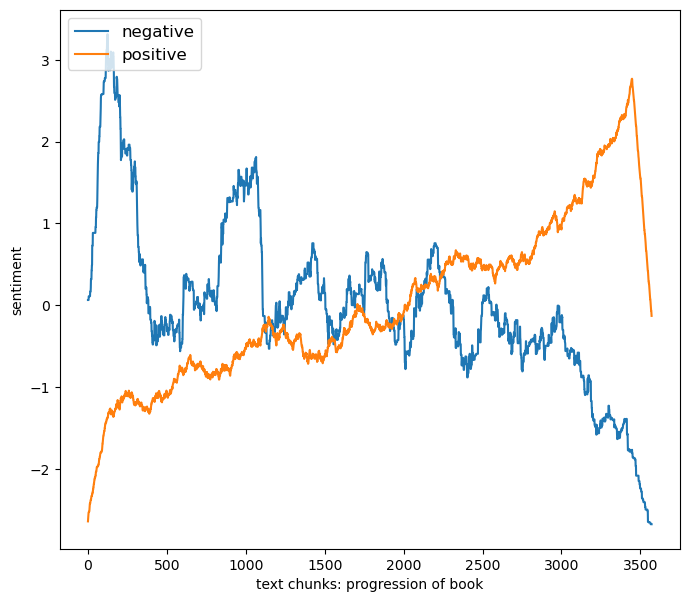

In [10]:

def moving_ave(y,w=100):
	#-----------------------
	# INSERT CODE TO COMPUTE THE MOVING AVERAGE OF A SIGNAL Y
	#-----------------------
	mask=np.ones((1,w))/w; mask=mask[0,:]
	return np.convolve(y,mask,'same')

# INSERT CODE TO VISUALIZE THE SENTIMENT ANALYSIS AS A TIME-SERIES (SEE PLOT FOR AN EXAMPLE)
if compute_sentiment :
    neg=moving_ave(sentiment[:,0],ave_window_size); 
    neg=(neg-np.mean(neg))/np.std(neg)

    neu=moving_ave(sentiment[:,1],ave_window_size); 
    neu=(neu-np.mean(neu))/np.std(neu)

    pos=moving_ave(sentiment[:,2],ave_window_size); 
    pos=(pos-np.mean(pos))/np.std(pos)
    
    cmpd=moving_ave(sentiment[:,3],ave_window_size); 
    cmpd=(cmpd-np.mean(cmpd))/np.std(cmpd)
    

    # plot
    plt.figure(figsize=(8,7))
    indx= np.linspace(0,len(sentiment),len(sentiment))
    plt.plot(indx,neg,label='negative')
    plt.plot(indx,pos,label='positive')

    plt.legend(loc='upper left',fontsize=12)
    plt.xlabel('text chunks: progression of book')
    plt.ylabel('sentiment')
    plt.show()

### Re-format output

In [11]:
# RE-FORMAT THE APRIORI OUTPUT INTO A PANDAS DATA-FRAME WITH COLUMNS "rhs","lhs","supp","conf","supp x conf","lift"
def reformat_results(results):
    keep=[]
    for i in range(0,len(results)):
        for j in range(0,len(list(results[i]))):
            if j>1:
                for k in range(0,len(list(results[i][j]))):
                    if len(results[i][j][k][0]) != 0:
                        rhs= list(results[i][j][k][0])
                        lhs= list(results[i][j][k][1])
                        conf= float(results[i][j][k][2])
                        lift= float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
            if j == 1:
                supp=results[i][j]
    return pd.DataFrame(keep, columns=["rhs","lhs","supp","conf","supp x conf","lift"])

In [12]:
def convert_to_network(df):
    print(df)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    # print(G.nodes)
    # print(G.edges)
    return G

In [13]:
def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e 	= [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    edgecolors="black",
    edge_color=colors_e,
    node_size=2000,
    linewidths=2,
    font_size=8,
    font_color="white",
    font_weight="bold",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set(title='Dracula')
    plt.show()

### Train ARM model

In [14]:
# TRAIN THE ARM MODEL USING THE "apriori" PACKAGE
print('Transactions:',pd.DataFrame(transactions))
results=list(apriori(transactions,min_support= 0.05,min_confidence=0.05,use_colnames=True))
print(len(results))

Transactions:            0          1           2             3           4          5    \
0         note        bad  experience        iphone          xr      phone   
1       camera      found   defective           non  functional       None   
2        amaon   careless        None          None        None       None   
3       havent        got    response  confirmation   replacing       None   
4      hanging    damaged       piece         worth       91000     rupees   
...        ...        ...         ...           ...         ...        ...   
3566      good  excellent   excellent          love   excellent  excellent   
3567   overall      great     product         loved        good       nice   
3568      nice     colour     feature      fabulous    exultant   fabulous   
3569     worth       good        good          good        good        buy   
3570  excelent       good        good          good        good       bill   

          6     7         8          9    ...   1

#### Analysis
In this part I applied the Apriori Algorithm to find put the frequent itemset of words that appear together in this text dataset.

### Visualize the results

                 rhs               lhs      supp      conf  supp x conf  \
0                 []           [phone]  0.052086  0.394068     0.020526   
1            [phone]                []  0.052086  0.174648     0.009097   
2            [apple]           [phone]  0.051806  0.424312     0.021982   
3            [phone]           [apple]  0.051806  0.173709     0.008999   
4          [awesome]           [phone]  0.054327  0.579104     0.031461   
5            [phone]         [awesome]  0.054327  0.182160     0.009896   
6          [battery]          [camera]  0.059647  0.345219     0.020591   
7           [camera]         [battery]  0.059647  0.434694     0.025928   
8          [battery]            [good]  0.088211  0.510535     0.045035   
9             [good]         [battery]  0.088211  0.391304     0.034517   
10         [battery]          [iphone]  0.050126  0.290113     0.014542   
11          [iphone]         [battery]  0.050126  0.251404     0.012602   
12         [battery]     

/var/folders/j3/s32rl54j1f76nvbcx9mxg4yc0000gn/T/ipykernel_7293/467521208.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lhs="_".join(row[1][0])
/var/folders/j3/s32rl54j1f76nvbcx9mxg4yc0000gn/T/ipykernel_7293/467521208.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rhs="_".join(row[1][1])
/var/folders/j3/s32rl54j1f76nvbcx9mxg4yc0000gn/T/ipykernel_7293/467521208.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conf=row[

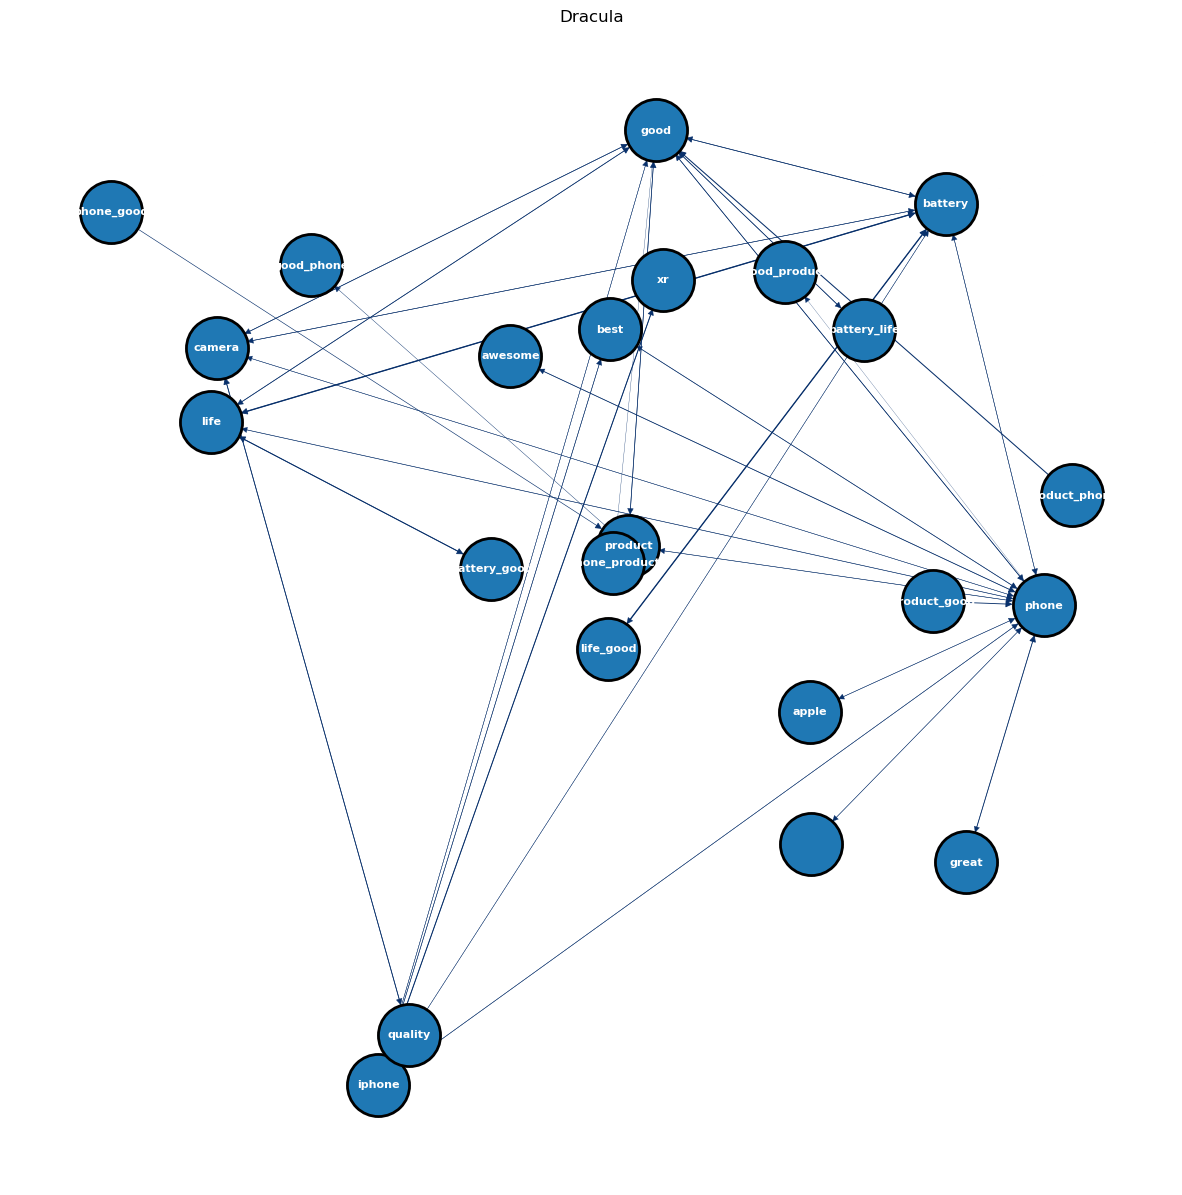

In [15]:
# PLOT THE RESULTS AS A NETWORK-X OBJECT 
pd_results=reformat_results(results)
G=convert_to_network(pd_results)
plot_network(G)

#### Analysis
I set min_support= 0.05, min_confidence=0.05, because I tried several times with smaller min_support and the result is too large so it did not ran out any resuly,  but with larger min_support, too little results came out. When min_support= 0.05, min_confidence=0.05, the length of result is 46. So i believe this is the optimal number. 

From the plot we can see thet the most connection are between iphone and its device model and the functions. Also there are many positive adjective that highly related to iphone and its functions. For example, "phone" are connected to "awesome" "best" "good_product" and "good_phone", etc. Thus, we can actually see when people mention iphone or its devices and functions, the most adjective are positive. So, we can conclude that people are positive to the Apple products

## Conclusion
In this part, I did data cleaning for the text data, and then created the transaction. After that, I trained the model and created the network and used Apriori package to dentifying the frequent individual items. Based on those I get the conclusion that, when people mentions Apple, they always mention its devices names, and also some positive adjective words. Thus, people has an positive attitude towards Apple products,

## Imporvement
The result did provide some sense about people's attitude related to apple products. But if we want to find out more about the its most competitive compeitors, those text dataset did not mention any, we maybe find a textdataset with more information with Apple and its competitors can be better analyzing its potential competitors. 